In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Reading Data

In [5]:
df= pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [7]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

In [10]:
df= df.drop(df.columns[0], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [11]:
categorical_cols= ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num_cols= ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
df['Churn']= pd.get_dummies(df['Churn'], drop_first=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,0
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,0
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,0


# Exploratory Data Analysis

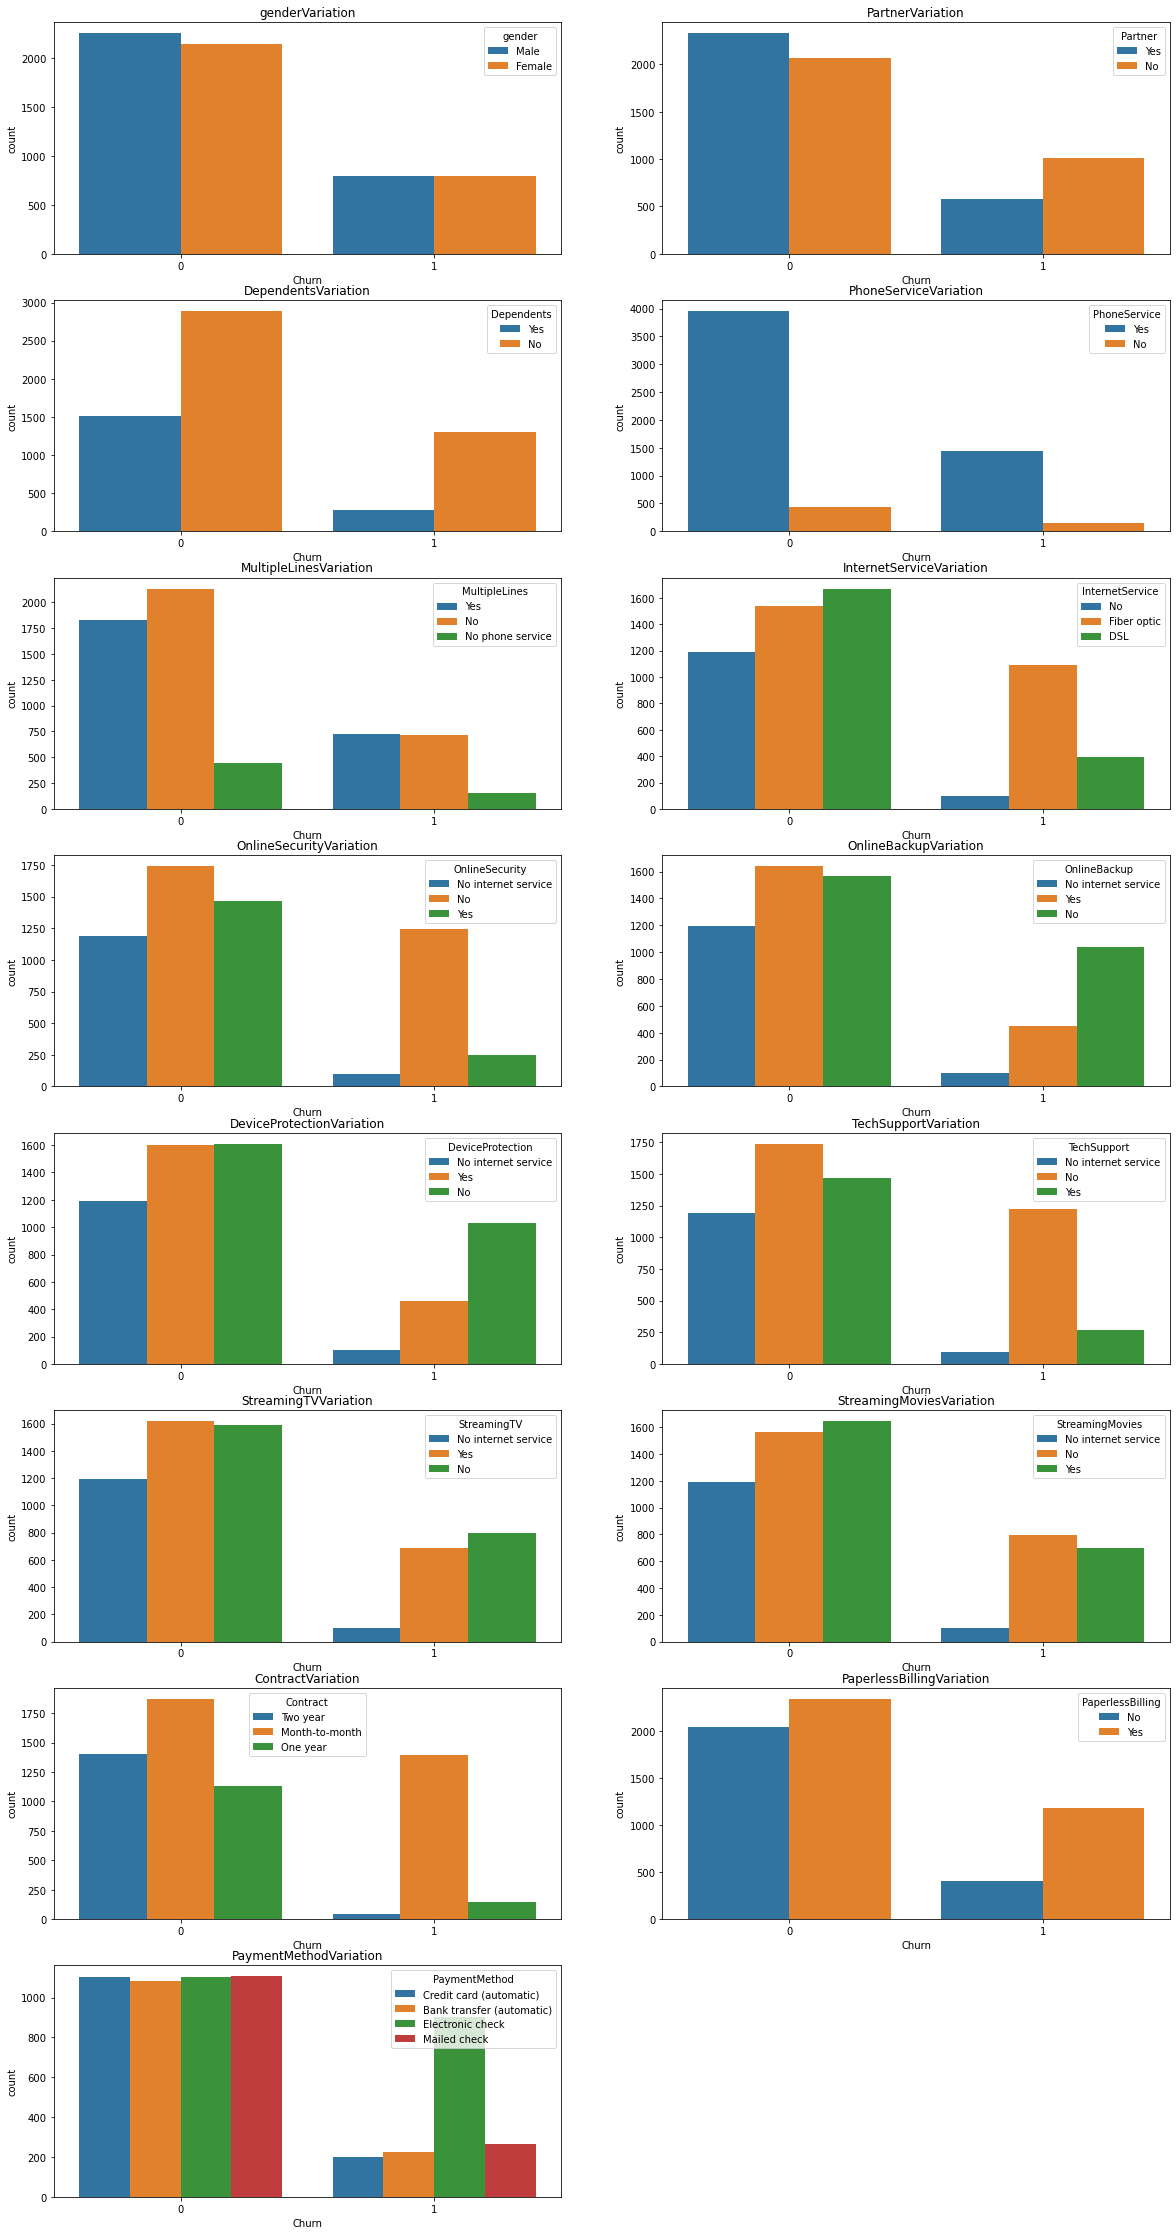

In [13]:
plt.figure(figsize= (20,40))

i=1
for col in categorical_cols:
    plt.subplot(8,2,i)
    sns.countplot(x= 'Churn', hue=col, data=df)
    plt.title(col + 'Variation')
    i=i+1
        

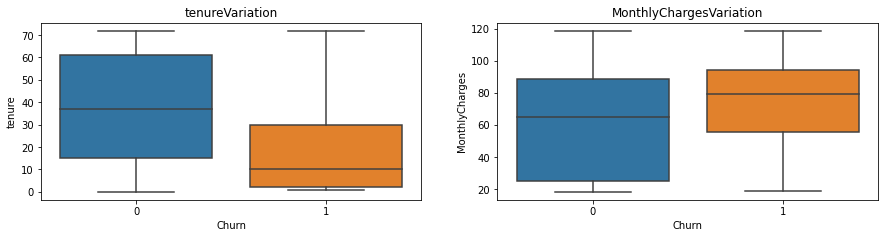

In [14]:
plt.figure(figsize=(15,15))
n= 1
for col in ['tenure', 'MonthlyCharges']:
    plt.subplot(4,2,n)
    sns.boxplot(x='Churn', y= col, data=df)
    plt.title(col + 'Variation')
    n=n+1

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

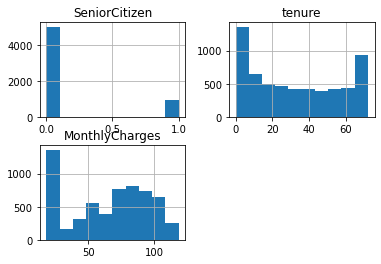

In [15]:
df[num_cols].hist()

# Creating Dummy Variables for Categorical Data

**We use get_dummies function of Pandas to get dummy variables for categorical data.**

**Drop first columns to prevent overfitting**

In [16]:
df_new= pd.get_dummies(df[categorical_cols],drop_first= True, prefix= 'dum_')

In [17]:
df_new.head()

,dum__Male,dum__Yes,dum__Yes,dum__Yes,dum__No phone service,dum__Yes,dum__Fiber optic,dum__No,dum__No internet service,dum__Yes,...,dum__No internet service,dum__Yes,dum__No internet service,dum__Yes,dum__One year,dum__Two year,dum__Yes,dum__Credit card (automatic),dum__Electronic check,dum__Mailed check
0,1,1,1,1,0,1,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


**Adding the Numerical Columns to our New Dataset**

(I created this new dataframe beacuse I didn't want to spoil original dataframe with dummy variables)

In [18]:
df_new[num_cols]= df[num_cols]
df_new['Churn']= df['Churn']

In [19]:
df_new.head()

,dum__Male,dum__Yes,dum__Yes,dum__Yes,dum__No phone service,dum__Yes,dum__Fiber optic,dum__No,dum__No internet service,dum__Yes,...,dum__Two year,dum__Yes,dum__Credit card (automatic),dum__Electronic check,dum__Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1,1,1,1,0,1,0,1,1,0,...,1,0,1,0,0,0,72,24.10,1734.65,0
1,0,0,0,1,0,0,1,0,0,0,...,0,1,1,0,0,0,44,88.15,3973.2,0
2,0,1,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,38,74.95,2869.85,1
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,4,55.90,238.5,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,2,53.45,119.5,0


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dum__Male                     5986 non-null   uint8  
 1   dum__Yes                      5986 non-null   uint8  
 2   dum__Yes                      5986 non-null   uint8  
 3   dum__Yes                      5986 non-null   uint8  
 4   dum__No phone service         5986 non-null   uint8  
 5   dum__Yes                      5986 non-null   uint8  
 6   dum__Fiber optic              5986 non-null   uint8  
 7   dum__No                       5986 non-null   uint8  
 8   dum__No internet service      5986 non-null   uint8  
 9   dum__Yes                      5986 non-null   uint8  
 10  dum__No internet service      5986 non-null   uint8  
 11  dum__Yes                      5986 non-null   uint8  
 12  dum__No internet service      5986 non-null   uint8  
 13  dum

In [21]:
df_new['TotalCharges']= pd.to_numeric(df_new['TotalCharges'], errors='coerce')

In [22]:
df_new.isna().sum()

dum__Male                        0
dum__Yes                         0
dum__Yes                         0
dum__Yes                         0
dum__No phone service            0
dum__Yes                         0
dum__Fiber optic                 0
dum__No                          0
dum__No internet service         0
dum__Yes                         0
dum__No internet service         0
dum__Yes                         0
dum__No internet service         0
dum__Yes                         0
dum__No internet service         0
dum__Yes                         0
dum__No internet service         0
dum__Yes                         0
dum__No internet service         0
dum__Yes                         0
dum__One year                    0
dum__Two year                    0
dum__Yes                         0
dum__Credit card (automatic)     0
dum__Electronic check            0
dum__Mailed check                0
SeniorCitizen                    0
tenure                           0
MonthlyCharges      

In [23]:
df_new['TotalCharges']= df_new['TotalCharges'].fillna(method= 'ffill')

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dum__Male                     5986 non-null   uint8  
 1   dum__Yes                      5986 non-null   uint8  
 2   dum__Yes                      5986 non-null   uint8  
 3   dum__Yes                      5986 non-null   uint8  
 4   dum__No phone service         5986 non-null   uint8  
 5   dum__Yes                      5986 non-null   uint8  
 6   dum__Fiber optic              5986 non-null   uint8  
 7   dum__No                       5986 non-null   uint8  
 8   dum__No internet service      5986 non-null   uint8  
 9   dum__Yes                      5986 non-null   uint8  
 10  dum__No internet service      5986 non-null   uint8  
 11  dum__Yes                      5986 non-null   uint8  
 12  dum__No internet service      5986 non-null   uint8  
 13  dum

# Building our Model

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Scaling the Numerical Columns**

In [26]:
X= df_new.drop('Churn', axis=1)
y= df_new['Churn']

X_train, X_test, y_train,  y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=100)

ss= StandardScaler()
ss.fit_transform(X_train[num_cols])
ss.transform(X_test[num_cols])

acc= []

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

acc.append(accuracy_score(y_test, y_pred))

0.8021702838063439
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       880
           1       0.65      0.56      0.60       318

    accuracy                           0.80      1198
   macro avg       0.75      0.72      0.73      1198
weighted avg       0.79      0.80      0.80      1198

[[783  97]
 [140 178]]


# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state= 100)
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

acc.append(accuracy_score(y_test, y_pred))

0.7971619365609349
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       880
           1       0.65      0.51      0.57       318

    accuracy                           0.80      1198
   macro avg       0.74      0.71      0.72      1198
weighted avg       0.79      0.80      0.79      1198

[[793  87]
 [156 162]]


# KNeighbors Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

dt= KNeighborsClassifier()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

acc.append(accuracy_score(y_test, y_pred))

0.7679465776293823
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       880
           1       0.58      0.47      0.52       318

    accuracy                           0.77      1198
   macro avg       0.70      0.67      0.68      1198
weighted avg       0.76      0.77      0.76      1198

[[770 110]
 [168 150]]


# Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB()
gnb.fit(X_train, y_train)
y_pred= gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

acc.append(accuracy_score(y_test, y_pred))

0.664440734557596
              precision    recall  f1-score   support

           0       0.94      0.58      0.72       880
           1       0.44      0.91      0.59       318

    accuracy                           0.66      1198
   macro avg       0.69      0.74      0.65      1198
weighted avg       0.81      0.66      0.68      1198

[[508 372]
 [ 30 288]]


# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

acc.append(accuracy_score(y_test, y_pred))

0.7312186978297162
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       880
           1       0.49      0.51      0.50       318

    accuracy                           0.73      1198
   macro avg       0.66      0.66      0.66      1198
weighted avg       0.73      0.73      0.73      1198

[[714 166]
 [156 162]]


In [32]:
acc

[0.8021702838063439,
 0.7971619365609349,
 0.7679465776293823,
 0.664440734557596,
 0.7312186978297162]

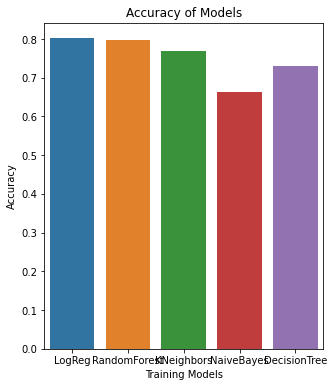

In [33]:
plt.figure(figsize= (5,6))
sns.barplot(x= ['LogReg', 'RandomForest', 'KNeighbors', 'NaiveBayes', 'DecisionTree'], y= acc)
plt.title('Accuracy of Models')
plt.xlabel('Training Models')
plt.ylabel('Accuracy')
plt.show()

**The Best Classifier for this model is Logistic Regression with accuracy and f1 score of 80%**